# Data exploration__________________________________

## · Descriptiva
Media, mediana, desviación estándar, mínimo y máximo para columnas numéricas Idea general de la distribución y el rango de los valores en esas columnas.

## · Visualización de la disponibilidad de bicicletas
Gráficos para visualizar la disponibilidad de bicicletas a lo largo del tiempo. Ejemplo: cantidad de bicicletas disponibles en función del tiempo para identificar patrones diarios, semanales o estacionales.

## · Análisis temporal
Datos por año, mes, día de la semana o hora del día para conocer estadísticas agregadas, como el promedio de bicicletas disponibles o el porcentaje de anclajes disponibles. Tendencias temporales y patrones de uso.

## · Relación entre variables
Explorar si hay una correlación entre el número de anclajes disponibles (num_docks_available) y el número de bicicletas disponibles (num_bikes_available). Investigar si la disponibilidad de bicicletas difiere entre los diferentes tipos de bicicletas (mecánicas y eléctricas).

In [40]:
#Correlación
def calculate_correlation(data, variable1, variable2):
    correlation = data[variable1].corr(data[variable2]).compute()
    return print(f"Correlación entre {variable1} y {variable2}: {correlation}")

In [38]:
def matriz_correlation(data, variable1, variable2):
    data_subset = data[[variable1, variable2]]
    correlation = data_subset.corr().compute()
    print(correlation)

#### Interpretar correlación
La diagonal principal de la matriz contiene los coeficientes de correlación de cada variable consigo misma, que siempre es 1. Esto es porque una variable está perfectamente correlacionada consigo misma.

La posición (i, j) y (j, i) de la matriz, donde i y j son los índices de las variables que te interesan, contiene el coeficiente de correlación entre esas dos variables. Este coeficiente puede variar entre -1 y 1, y proporciona información sobre la fuerza y la dirección de la relación entre las variables:

- Un coeficiente de correlación de 1 indica una correlación positiva perfecta, lo que significa que cuando una variable aumenta, la otra variable también aumenta en una relación lineal.

- Un coeficiente de correlación de -1 indica una correlación negativa perfecta, lo que significa que cuando una variable aumenta, la otra variable disminuye en una relación lineal.

- Un coeficiente de correlación cercano a 0 indica una correlación débil o nula, lo que significa que no hay una relación lineal aparente entre las variables.

In [41]:
calculate_correlation(bbdd_completa, 'dayofweek', 'num_bikes_available')
matriz_correlation(bbdd_completa, 'dayofweek', 'num_bikes_available')

/Users/sandradiaz/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Correlación entre dayofweek y num_bikes_available: 0.009994235790232122
                     dayofweek  num_bikes_available
dayofweek             1.000000             0.009994
num_bikes_available   0.009994             1.000000


In [42]:
calculate_correlation(bbdd_completa, 'num_docks_available', 'num_bikes_available')
matriz_correlation(bbdd_completa, 'num_docks_available', 'num_bikes_available')

/Users/sandradiaz/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Correlación entre num_docks_available y num_bikes_available: -0.6481370244894895
                     num_docks_available  num_bikes_available
num_docks_available             1.000000            -0.648137
num_bikes_available            -0.648137             1.000000


In [43]:
calculate_correlation(bbdd_completa, 'capacity', 'num_bikes_available')
matriz_correlation(bbdd_completa, 'capacity', 'num_bikes_available')

/Users/sandradiaz/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Correlación entre capacity y num_bikes_available: 0.33375302683849645
                     capacity  num_bikes_available
capacity             1.000000             0.333753
num_bikes_available  0.333753             1.000000


In [44]:
calculate_correlation(bbdd_completa, 'num_bikes_available', 'dayofweek')
matriz_correlation(bbdd_completa, 'num_bikes_available', 'dayofweek')

/Users/sandradiaz/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Correlación entre num_bikes_available y dayofweek: 0.009994235790232122
                     num_bikes_available  dayofweek
num_bikes_available             1.000000   0.009994
dayofweek                       0.009994   1.000000


In [45]:
calculate_correlation(bbdd_completa, 'num_bikes_available', 'hour')
matriz_correlation(bbdd_completa, 'num_bikes_available', 'hour')

/Users/sandradiaz/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Correlación entre num_bikes_available y hour: -0.04490539730893757
                     num_bikes_available      hour
num_bikes_available             1.000000 -0.044905
hour                           -0.044905  1.000000


## · Análisis de capacidad y porcentaje de anclajes disponibles
Capacidad (capacity) y los porcentajes de anclajes disponibles (ctx0, ctx1, ctx2, ctx3, ctx4). Promedio distribución de la capacidad y los porcentajes de anclajes disponibles. Objetivo: entender la utilización de las estaciones de bicicletas a lo largo del tiempo.

In [127]:
capacidad_promedio = bbdd_completa['capacity'].mean().compute()

distribucion_porcentaje = bbdd_completa[['ctx0', 'ctx1', 'ctx2', 'ctx3', 'ctx4']].describe().compute()

print(f"Promedio de la capacidad: {capacidad_promedio}")
print("Distribución de los porcentajes de anclajes disponibles:")
print(distribucion_porcentaje)


Promedio de la capacidad: 27.038570300875005
Distribución de los porcentajes de anclajes disponibles:
               ctx0          ctx1          ctx2          ctx3          ctx4
count  4.494624e+06  4.494624e+06  4.494624e+06  4.494624e+06  4.494624e+06
mean   5.860364e-01  5.860870e-01  5.861595e-01  5.862645e-01  5.863754e-01
std    2.613364e-01  2.613520e-01  2.613400e-01  2.612991e-01  2.612550e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    4.000000e-01  4.000000e-01  4.000000e-01  4.000000e-01  4.000000e-01
50%    6.285714e-01  6.296296e-01  6.293706e-01  6.296296e-01  6.294643e-01
75%    8.045455e-01  8.042328e-01  8.044872e-01  8.047138e-01  8.042328e-01
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00


In [128]:
# Datos por mes y hora, y calcula la media de 'ctx0' en cada grupo
mean_by_month_hour = bbdd_completa.groupby(['month', 'hour'])['ctx0'].mean().compute()
print(mean_by_month_hour)

month  hour
1      0       0.546559
       1       0.542977
       2       0.542806
       3       0.542355
       4       0.542186
                 ...   
12     19      0.593606
       20      0.582659
       21      0.573873
       22      0.570718
       23      0.569456
Name: ctx0, Length: 288, dtype: float64


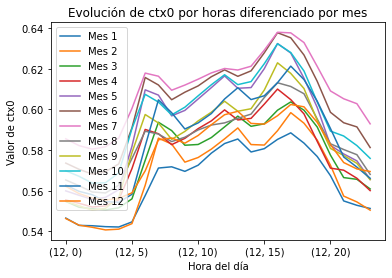

In [129]:
# Figura y eje
fig, ax = plt.subplots()

# Iteración sobre los grupos para generar línea por mes
for month, group in mean_by_month_hour.groupby(level=0):
    group.plot(ax=ax, label=f"Mes {month}")

# Ejes y leyenda
ax.set_xlabel('Hora del día')
ax.set_ylabel('Valor de ctx0')
ax.set_title('Evolución de ctx0 por horas diferenciado por mes')
ax.legend()

plt.show()

In [131]:
# Datos por día semana y hora, y calcula la media de 'ctx0' en cada grupo
mean_by_dayofweek_hour = bbdd_completa.groupby(['dayofweek', 'hour'])['ctx0'].mean().compute()
print(mean_by_dayofweek_hour)

dayofweek  hour
0          0       0.563457
           1       0.561311
           2       0.559449
           3       0.559978
           4       0.563380
                     ...   
6          19      0.588824
           20      0.579350
           21      0.575999
           22      0.573815
           23      0.568222
Name: ctx0, Length: 168, dtype: float64


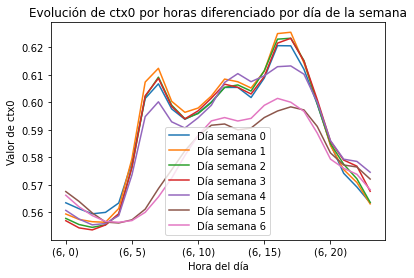

In [134]:
# Figura y eje
fig, ax = plt.subplots()

# Iteración sobre los grupos para generar línea por mes
for dayofweek, group in mean_by_dayofweek_hour.groupby(level=0):
    group.plot(ax=ax, label=f"Día semana {dayofweek}")

# Ejes y leyenda
ax.set_xlabel('Hora del día')
ax.set_ylabel('Valor de ctx0')
ax.set_title('Evolución de ctx0 por horas diferenciado por día de la semana')
ax.legend()

plt.show()

# Datos adicionales
Tiempo, festivos Barcelona

In [114]:
df_calendari_festius = pd.read_csv('/Users/sandradiaz/Documents/CaptstoneProject/dades/Altres_dades/calendari_festius.csv',sep=';')

In [115]:
df_calendari_festius.head()

,fecha,festius,festius_sun,festius_sun_sat,dia_sem
0,1/1/19,Yes,Yes,Yes,3
1,2/1/19,No,No,No,4
2,3/1/19,No,No,Yes,5
3,4/1/19,No,No,No,6
4,5/1/19,No,No,No,7


In [116]:
df_calendari_festius.columns

Index(['fecha', 'festius', 'festius_sun', 'festius_sun_sat', 'dia_sem'], dtype='object')

In [142]:
df_calendari_festius['fecha'] = pd.to_datetime(df_calendari_festius['fecha'])
df_calendari_festius.dtypes

fecha              datetime64[ns]
festius                    object
festius_sun                object
festius_sun_sat            object
dia_sem                     int64
dtype: object

In [147]:
# formato fecha específico
def timestamp_to_date(timestamp):
    date = datetime.fromtimestamp(timestamp)
    return date.strftime('%d/%m/%Y')

#insertamos nueva columna en bbdd_completa
bbdd_completa['fecha'] = bbdd_completa['timestamp'].map_partitions(timestamp_to_date, meta=('fecha', 'str'))

bbdd_completa.columns
bbdd_completa.dtypes

station_id                                int64
num_bikes_available                     float64
num_bikes_available_types.mechanical    float64
num_bikes_available_types.ebike         float64
num_docks_available                     float64
is_charging_station                       int64
status                                    int64
is_installed                              int64
is_renting                                int64
is_returning                              int64
timestamp                                 int64
year                                      int64
month                                     int64
dayofweek                                 int64
day                                       int64
dayofyear                                 int64
hour                                      int64
capacity                                float64
ctx0                                    float64
ctx1                                    float64
ctx2                                    

In [149]:
bbdd_completa['fecha'] = pd.to_datetime(bbdd_completa['fecha'])
bbdd_completa.dtypes

TypeError: cannot convert the series to <class 'int'>

In [144]:
# Realizar el merge utilizando Dask
#df_merged = dd.merge(bbdd_completa, df_calendari_festius[['fecha', 'festius', 'festius_sun', 'festius_sun_sat']], on='fecha', how='left')
df_merged = dd.merge(bbdd_completa, df_calendari_festius, on='fecha', how='left')

# Computar los resultados
df_merged = df_merged.compute()

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat